https://www.kaggle.com/datasets/rishikeshkanabar/premier-league-player-statistics-updated-daily

In [1]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #benzerlik skoru
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("dataset - 2020-09-24.csv")

In [3]:
df.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     570 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         309 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored        309 non-null    fl

In [5]:
df['Total chances'] = df['Goals'] + df['Assists']

Futblocuların elde ettiği gol ve asist sayısna  göre kümelenmesi

In [13]:
df_grouped = df.groupby("Name")["Total chances"].mean()

In [14]:
df_grouped = df_grouped.to_frame().reset_index()

In [15]:
df_grouped.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           571 non-null    object 
 1   Total chances  571 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.0+ KB


In [17]:
df_grouped.sort_values(by="Total chances",ascending=False , inplace= True) 

In [18]:
df_grouped.head()

,Name,Total chances
502,Sergio Agüero,226.0
201,Harry Kane,168.0
240,James Milner,139.0
247,Jamie Vardy,134.0
455,Raheem Sterling,131.0


In [19]:
data_cus1_dummy = pd.get_dummies(df_grouped , drop_first = True)

number of cluster 2, silhouette 0.8245550472525259
number of cluster 3, silhouette 0.7684454923762406
number of cluster 4, silhouette 0.7476818223840157
number of cluster 5, silhouette 0.6833227277811889
number of cluster 6, silhouette 0.6825330920920767
number of cluster 7, silhouette 0.6599708591870844
number of cluster 8, silhouette 0.6170912104168442
number of cluster 9, silhouette 0.6193263580117286
number of cluster 10, silhouette 0.6079475585063276


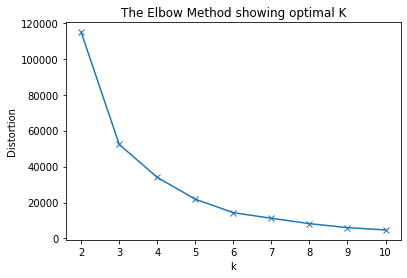

In [20]:

def cluster(x,clusters):
    allscore=[]
    allclusters=[]
    sum_of_squared_distances = []
    x=x
    for i in np.arange(1,clusters):

          i+=1
          model=KMeans(n_clusters=i)
          pred=model.fit_predict(x)
          s_score = silhouette_score(x,pred)
          score=silhouette_score(x,pred)
          print("number of cluster {}, silhouette {}".format(i,score))
          allscore.append(s_score)
          allclusters.append(i)
          sum_of_squared_distances.append(model.inertia_)

    plt.plot(allclusters,sum_of_squared_distances, marker='x')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing optimal K')
    plt.show()
cluster(data_cus1_dummy,10)

4 kümeye ayrılması en uygundur

In [22]:
model = KMeans(n_clusters = 4)

model = model.fit(data_cus1_dummy)

pred = model.predict(data_cus1_dummy)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


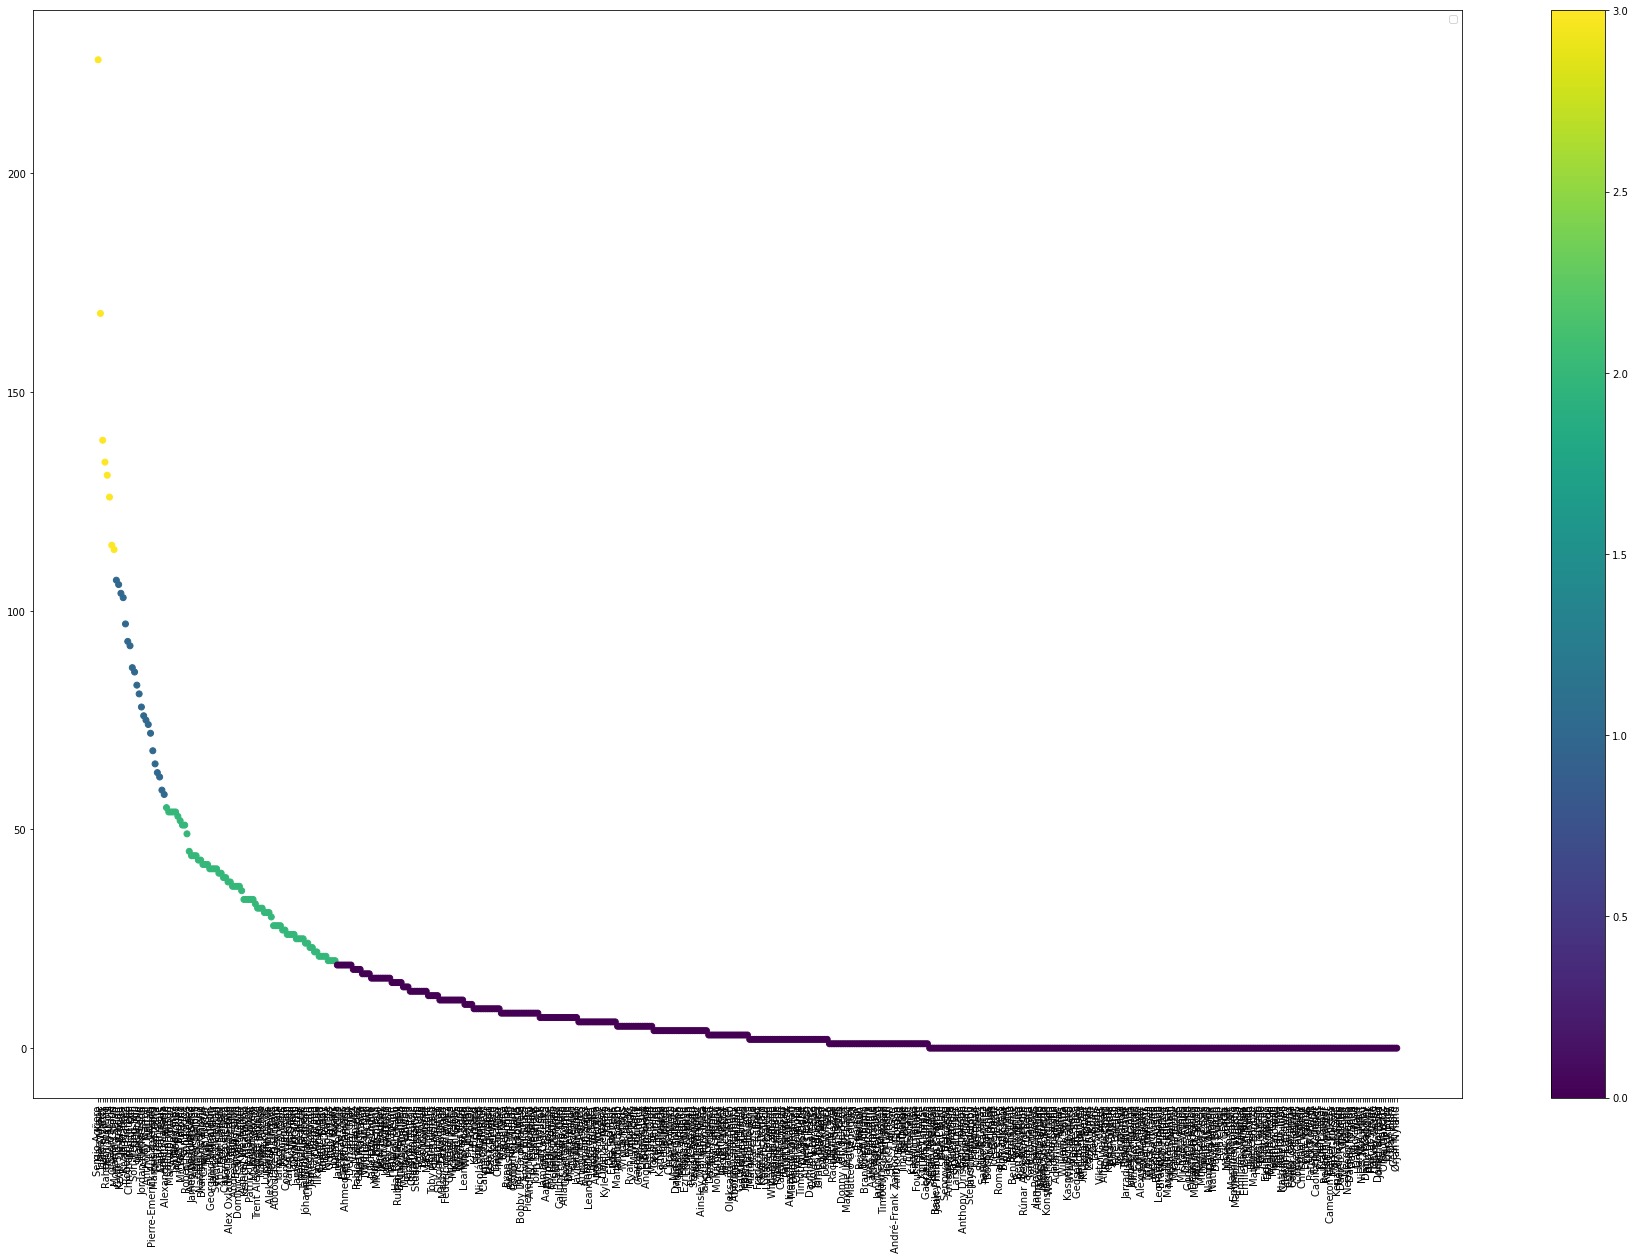

In [24]:
plt.figure(figsize = (32,20))  
plt.scatter(df_grouped["Name"],df_grouped["Total chances"] , c = pred)
plt.legend()
plt.xticks(rotation = 90)
plt.colorbar()
plt.show() 

In [25]:
df_grouped["clust(recency)"] = pred

In [31]:
df_grouped.sample(30)

,Name,Total chances,clust(recency)
523,Tariq Lamptey,2.0,0
194,Granit Xhaka,21.0,2
167,Fabian Schär,7.0,0
422,Nicolás Otamendi,9.0,0
385,Max Lowe,0.0,0
568,Zak Brunt,0.0,0
215,Ilkay Gündogan,21.0,2
487,Rúnar Alex Rúnarsson,0.0,0
386,Max Meyer,3.0,0
219,Ivan Cavaleiro,4.0,0
